In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
from datetime import datetime as dt
import dash_table
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import networkx as nx

In [3]:
aaa = pd.read_excel('C:\\Users\\a3011\\빅데이터 공유혁신 공모전 준비\\everytime_count_words_220105 (1).xlsx',index_col=0)
aaa.head()

,0,1,2,3,4,5,6,7,8,9,...,262,263,264,265,266,267,268,269,270,271
0,토익,공략법,자신,점수,위치,시간,재서,시간,재지,점수,...,느낌,정리,표현,평어체,작성,양해,부탁,댓글,질문,거절
1,학생증,학생증,옥색,사용,내년,생각,재미,학생증,디자인,전공,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,필기,실기,공부법,꿀팁,전역,고민,시험,시험,효율,시간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,총학,기호,사퇴,결과,발표,행동,총학,생회,사과,사과문,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ㅈ군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bbb = pd.read_excel('C:\\Users\\a3011\\빅데이터 공유혁신 공모전 준비\\everytime_clean.xlsx')
col = list(bbb.columns)
col[0] = 'idx'
bbb.columns = col
bbb.head()

,idx,days,like,daegle,scrape,context,clean
0,0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
1,1,21/08/22 17:22,462,97,32,바뀔리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사용...,바뀔 리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사...
2,2,21/10/26 21:58,449,40,816,"컴활 1급 필기, 실기 공부법 그리고 꿀팁 https://m.blog.naver.c...",컴활 필기 실기 공부법 그리고 꿀팁 갓 전역하고 뭘 할까 고민하다가 컴활 시험을 치...
3,3,21/11/19 22:04,354,50,2,총학 기호 1번 하나 사퇴하세요. 결과 발표 나자마자 이딴식으로 행동하는데 어떻게 ...,총학 기호 하나 사퇴하세요 결과 발표 나자마자 이딴 식으로 행동하는데 어떻게 총학생...
4,4,21/09/07 16:48,349,110,74,"나 잘 짖는다 ㅈㄱㄴ, 0:10, 0:11, 핫게 보내줬네.. 고마워서 한번 더 짖...",나 잘 짖는다 ㅈ군 하게 보내줬네 고마워서 한 번 더 짖었어


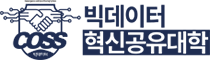

In [5]:

img = Image.open('bd_logo.png')
img

In [6]:
bbb.days = bbb.days.astype('str')

In [7]:
lst = []
for i in bbb.days.str[:10]:
    lst.append(i.split(' ')[0])

In [8]:
lst2 = []
for i in lst:
    if len(i)>8:
        lst2.append(i[2:])
    else:
        lst2.append(i)

In [9]:
lst3 = []
for i in lst2:
    lst3.append('20'+i.replace('-','/'))

In [10]:
bbb.days = lst3

In [11]:
bbb

,idx,days,like,daegle,scrape,context,clean
0,0,2021/07/12,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
1,1,2021/08/22,462,97,32,바뀔리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사용...,바뀔 리 없는 학생증 심심해서 만들어봄 일단 학생증 보고 너무 옥색에 촌스러워서 사...
2,2,2021/10/26,449,40,816,"컴활 1급 필기, 실기 공부법 그리고 꿀팁 https://m.blog.naver.c...",컴활 필기 실기 공부법 그리고 꿀팁 갓 전역하고 뭘 할까 고민하다가 컴활 시험을 치...
3,3,2021/11/19,354,50,2,총학 기호 1번 하나 사퇴하세요. 결과 발표 나자마자 이딴식으로 행동하는데 어떻게 ...,총학 기호 하나 사퇴하세요 결과 발표 나자마자 이딴 식으로 행동하는데 어떻게 총학생...
4,4,2021/09/07,349,110,74,"나 잘 짖는다 ㅈㄱㄴ, 0:10, 0:11, 핫게 보내줬네.. 고마워서 한번 더 짖...",나 잘 짖는다 ㅈ군 하게 보내줬네 고마워서 한 번 더 짖었어
...,...,...,...,...,...,...,...
377,377,2020/06/26,104,14,2,한학기 동안 ... 매번 밝은 얼굴로 환영해주셔서 고마웠습니다 ㅠㅠ 고맙지만 두번 ...,한 학기 동안 매번 밝은 얼굴로 환영해주셔서 고마웠습니다 ㅠㅠ 고맙지만 두 번 다신...
378,378,2020/05/12,104,143,3,고양이 좋아하고 집에서 기르는건 상관없는데 길고양이 밥챙겨주는건 싫어함 나도 크집사...,고양이 좋아하고 집에서 기르는 건 상관없는데 길고양이 밥 챙겨주는 건 싫어함 나도 ...
379,379,2020/02/15,103,11,0,학교이름 이거어때? 경남대딱대,학교 이름 이거 어때 경남대 탁대
380,380,2020/06/30,103,54,1,반수 마음 먹은 사람들 빨리 수능공부해라 제발 에타에다가 진주랑 경상대 현타온다는 ...,반수 마음먹은 사람들 빨리 수능 공부해라 제발 에타에다가 진주랑 경상대 현 따온다 ...


In [12]:
bbb.days = pd.to_datetime(bbb.days)

In [13]:
max(bbb.days)

Timestamp('2021-12-31 00:00:00')

In [14]:
#### counting data ####
def counting_data(x):
    num = x.shape[0]
    minimum_days = min(x.days)
    maximum_days = max(x.days)
    return num , minimum_days, maximum_days

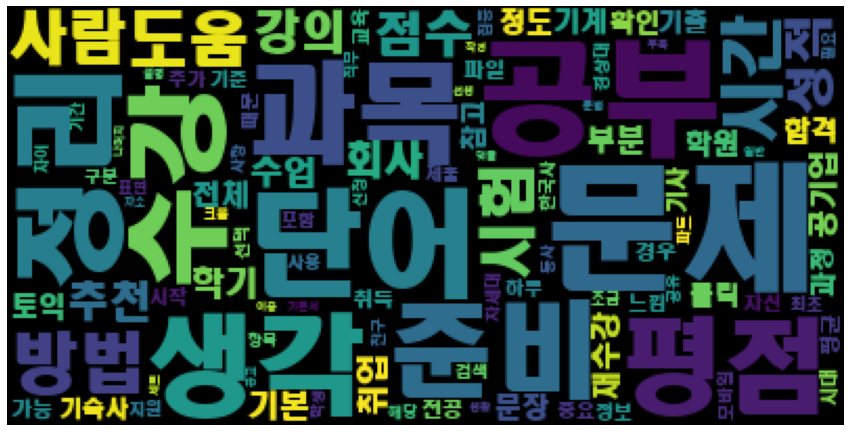

In [15]:
#####  Word Cloud #####

everyword_df = pd.read_excel('C:\\Users\\a3011\\빅데이터 공유혁신 공모전 준비\\everytime_count_words_220105 (1).xlsx',index_col=0)
every = pd.read_excel('C:\\Users\\a3011\\빅데이터 공유혁신 공모전 준비\\everytime_clean.xlsx',index_col=0)
scrap_words_df = everyword_df.iloc[every[every.scrape>200].sort_values('scrape',ascending=False).index,:]
lst2 = []
for i in scrap_words_df.index:
    lst = []
    for j in list(scrap_words_df.loc[i,:]):
        if type(j) == str:
            lst.append(j)
        else:
            pass
            
    lst2.append(lst)
lst3 = []
for i in lst2:
    lst3.extend(i)
from collections import Counter
counts = Counter(lst3)
tags = counts.most_common(100)
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HMKMRHD.TTF')
cloud = wc.generate_from_frequencies(dict(tags))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
wordcloud_figure = plt.imshow(cloud)

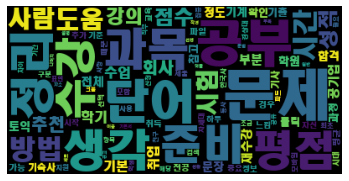

In [16]:
plt.axis('off')
plt.imshow(cloud)

In [17]:
word_cloud_img = cloud.to_image()

In [18]:
word_fre_df = pd.DataFrame([counts.keys(),counts.values()]).T
word_fre_df.columns =['단어','빈도']

In [19]:
word_fre_df

,단어,빈도
0,토익,11
1,공략법,3
2,자신,8
3,점수,16
4,위치,3
...,...,...
921,브라우,1
922,데이터,1
923,저장,1
924,카카오톡,1


In [20]:
every = every.drop([136])

In [21]:
lst = []
for i in tags:
    lst.append(i[0])
dictonary = dict()
for i in lst:
    abc = every[every.clean.str.contains(i)]
    a = list(abc[abc.scrape>200].index)
    dictonary[i] = a
import networkx as nx
lst = []
for i in dictonary.keys():
    for j in dictonary[i]:
        lst.append((i,j))
graph_network_df = pd.DataFrame(lst)
graph_network_df.columns = ['source','target']
G = nx.from_pandas_edgelist(graph_network_df, source='source',target='target')

In [22]:
check_degree = pd.DataFrame([nx.degree_centrality(G).keys(),nx.degree_centrality(G).values()]).T
check_between = pd.DataFrame([nx.betweenness_centrality(G).keys(),nx.betweenness_centrality(G).values()]).T

In [23]:
check_degree.columns = ['node','degree_centrality']
check_between.columns = ['node','between_centrality']

In [41]:
bbb.idx = bbb.idx.astype('string')
bbb.like = bbb.like.astype('string')
bbb.daegle = bbb.daegle.astype('string')
bbb.scrape = bbb.scrape.astype('string')

In [42]:
bbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙∙∙∙∙ ⓵, - 먼저 RC 100문제를 2세트 풀어본다 (한번은 75분 시간재서, 한번은 시간 재지말고), - 점수 차이가 많이 안 난다 → 자기 스스로 뭘 알고 모르는지 알고 있음, 기본서로 모르는 것 위주로 공부, - 점수 차이가 많이 난다 → 아마 대부분 Part 7 일부를 보지도 못하고 찍는 사람들이 많을 것임, 근데 700 이하니까 자기가 풀었던 문제들도 꽤 많이 틀렸을테니 기본서를 첫 페이지부터 시작, , ∙ 자신의 점수가 800 이상이다 ∙∙∙∙∙∙ ⓶, - 먼저 RC 100문제를 2세트 풀어본다 (한번은 75분 시간재서, 한번은 시간 재지말고), - 시간 재고 꾸준히 문제를 풀자 (더도 말고 덜도 말고 하루 한 세트씩), , → 점수 기준은 그냥 내가 정한 기준이니 절대적인 기준이라고 생각하지 않았으면 함. (⓶에 해당하는 사람이 ⓵로 해도 아무 문제없다. 단, 그 반대는 조금 비효율적일 거 같아 추천하지 않지만 자기에게 맞다고 생각들면 본인이 잘 판단해서 시작하길), , Q. 기본서로는 어떻게 공부를 하나요?, A. 문법 같은 경우 많이 나온다 싶은 것들은 외우는 것이 좋다. 그렇다고 단어 외우듯이 외우라는 게 아니고 많이 봄으로써 체화를 시키라는 거다. 예를 들자면, 빈도부사의 경우 be동사나 조동사 뒤에 오고, 일반동사 앞에 온다는 걸 느낌적으로 알고 있으면 그걸로 충분하다. (막 이 문장을 노트에 정리해서 외우려는 건 의미없음), 다른 예들을 들면 이런 거다. 보고 답을 할 수 있으면 된다., ∙ because와 because of의 차이, ∙ make, have, let 뒤에 와야 할 동사의 형태, ∙ “Yesterday I recalled that I had struggled when I was a little kid.” 문장에서 recalled와 h

In [49]:
check_degree[check_degree.degree_centrality>0.1]

,node,degree_centrality
1,0,0.314516
2,17,0.233871
3,33,0.362903
4,89,0.306452
5,168,0.129032
6,208,0.153226
7,257,0.112903
13,9,0.25
14,129,0.193548
15,131,0.233871


In [51]:
check_between[check_between.between_centrality>0.1]

,node,between_centrality
1,0,0.14709
3,33,0.220789
4,89,0.134775
13,9,0.13229
15,131,0.1455


In [81]:
quality_index = set(check_degree[check_degree.degree_centrality>0.1].node) & set(check_degree[check_between.between_centrality>0.1].node)

In [83]:
quality_post = every.loc[quality_index,:]

In [84]:
quality_post

,days,like,daegle,scrape,context,clean
0.0,21/07/12 01:02,496,33,1271,토익 RC 공략법 ∙ 자신의 점수가 700 이하다 혹은 내 위치를 잘 모르겠다 ∙∙...,토익 공략법 자신의 점수가 이하다 혹은 내 위치를 잘 모르겠다 먼저 풀어본다 한 번...
33.0,21/07/28 19:54,178,67,410,"공기업 합격수기!!! 공기업 취업했습니다!, , 한국가스기술공사 기계직 최종합격했습...",공기업 합격수기 공기업 취업했습니다 한국가스기술공사 기계직 최종 합격했습니다 공기업...
131.0,21/05/10 13:32,227,37,1018,재수강하려는 친구들아 ! 참고해 ! 1학년 2학기에 D+받은 과목 2학년 2학기에 ...,재수강하려는 친구들아 참고해 받은 과목 받고 듣고 들어서 정리하면 재수강했으니 최초...
9.0,21/08/14 18:04,283,18,1205,"⭐취린이를 위한 취업 준비 시작 방법 정리⭐ 당장에 취업을 준비해야 하는데,, 어떻...",취리 나이를 위한 취업 준비 시작 방법 정리 당장에 취업을 준비해야 하는데 어떻게 ...
89.0,21/07/12 22:02,108,7,305,토익 LC 공략법 LC는 시험 때 말고 푼 적이 별로 없다보니 노력해서 점수 올린 ...,토익 공략법은 시험 때 말고 푼 적이 별로 없다 보니 노력해서 점수 올린 사람들의 ...


In [145]:
# Plotly figure
def networkGraph(G):

    pos = nx.spring_layout(G)

    # edges trace
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(color='black', width=1),
        hoverinfo='none',
        showlegend=False,
        mode='lines')

    # nodes trace
    node_x = []
    node_y = []
    text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        text.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y, text=text,
        mode='markers+text',
        showlegend=False,
        hoverinfo='none',
        marker=dict(
            color='blue',
            size=list(np.array(degrees)*2),
            line=dict(color='black', width=1),
            sizemin=11),
        textfont=dict(color='red'))

    # layout
    layout = dict(plot_bgcolor='white',
                  paper_bgcolor='white',
                  margin=dict(t=10, b=10, l=10, r=10, pad=0),
                  xaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True),
                  yaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True))

    # figure
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

    return fig

In [147]:
fig = networkGraph(G)

In [ ]:
html.Div(dcc.Graph(figure=fig),style={'width':'84%','float':'right'}),

In [ ]:
bbb['id'] = bbb['context']
bbb.set_index('id', inplace=True, drop=False)
def counting_data(bbb):
    num = bbb.shape[0]
    minimum_days = min(bbb.days)
    maximum_days = max(bbb.days)
    sentence = '게시글 갯수 : '+str(num), ', 수집된 데이터 날짜 : ' + str(minimum_days) +'~'+str(maximum_days)
    return sentence
app = dash.Dash(__name__)



app.layout = html.Div([
    html.Div([html.Img(className='log',src=img)]),
    html.Div([html.H1(children='빅데이터 혁신 공유대학 아이디어 공모전'),html.H2(children='팀명 : GNU.STAT')]),
    html.Div([html.H1(children='대학생 커뮤니티 사이트 분석결과')]),
    html.Div([html.H2(children=counting_data(bbb))]),
    html.Div([dash_table.DataTable(id='data_table',
                                   columns=[{'id':i,'name':i} for i in bbb.columns[:6]],
                                   style_cell={
                                        'overflow': 'hidden',
                                        'textOverflow': 'ellipsis',
                                        'minWidth' : '50px',
                                        'maxWidth': '130px',
                                        'textAlign':'left'
                                   },
                                   style_cell_conditional=[
                                    {'if': {'column_id': 'idx'},
                                     'width': '1%'},   
                                    {'if': {'column_id': 'days'},
                                     'width': '5%'},
                                    {'if': {'column_id': 'like'},
                                     'width': '1%'},
                                    {'if': {'column_id': 'daegle'},
                                     'width': '1%'},
                                    {'if': {'column_id': 'scrape'},
                                     'width': '1%'},
                                   ],
                                   data=bbb.to_dict('records'),
                                   editable=True,
                                   filter_action='native',
                                   sort_action='native',
                                   sort_mode='multi',
                                   row_selectable='multi',
                                   row_deletable=True,
                                   selected_columns=[],
                                   selected_rows=[],
                                   page_action='native',
                                   page_current=0,
                                   page_size=10,)]),
# [html.Img(className='wordcloud',src=word_cloud_img,style={'height':'30%','width':'30%'}), 워드클라우드 이미지
    html.Div([
        html.Div([dash_table.DataTable(id='wordcloud_frequency',
                                             columns=[{'id':i,'name':i} for i in word_fre_df.columns],
                                             data=word_fre_df.to_dict('records'),
                                             style_cell={
                                                'overflow': 'hidden',
                                                'textOverflow': 'ellipsis',
                                                'Width' : '10%',
                                                'textAlign':'left'
                                           },
                                           editable=False,
                                           filter_action='native',
                                           sort_action='native',
                                           sort_mode='multi',
                                           row_selectable='multi',
                                           row_deletable=True,
                                           selected_columns=[],
                                           selected_rows=[],
                                           page_action='native',
                                           page_current=0,
                                           page_size=10,),
                 html.Div([html.H1(children=' ')]),
                 html.Div([html.H1(children=' ')]),
                 html.Div([html.H1(children=' ')]),
                 ],style={'width':'15%','float':'left'}),

        
        html.Div(id='select_context',children='None',style={'width':'84%','float':'right','border':'1px solid black'}),
        
             ]),
    html.Div(dcc.Graph(figure=fig),style={'width':'84%','height':'100%','float':'right'}),
    html.Div([html.H1(children=' ')]),
    
    html.Div([

        html.Div([dash_table.DataTable(id='degree_centrality',
                                             columns=[{'id':i,'name':i} for i in check_degree.columns],
                                             data=check_degree.to_dict('records'),
                                             style_cell={
                                                'overflow': 'hidden',
                                                'textOverflow': 'ellipsis',
                                                'Width' : '10%',
                                                'textAlign':'left'
                                           },
                                            editable=False,
                                           filter_action='native',
                                           sort_action='native',
                                           sort_mode='multi',
                                           row_selectable='multi',
                                           row_deletable=True,
                                           selected_columns=[],
                                           selected_rows=[],
                                           page_action='native',
                                           page_current=0,
                                           page_size=10,),],style={'width':'15%'}),
                  
        

        html.Div([html.H1(children=' ')]),
        html.Div([dash_table.DataTable(id='between_centrality',
                                             columns=[{'id':i,'name':i} for i in check_between.columns],
                                             data=check_between.to_dict('records'),
                                             style_cell={
                                                'overflow': 'hidden',
                                                'textOverflow': 'ellipsis',
                                                'Width' : '10%',
                                                'textAlign':'left'
                                           },
                                            editable=False,
                                           filter_action='native',
                                           sort_action='native',
                                           sort_mode='multi',
                                           row_selectable='multi',
                                           row_deletable=True,
                                           selected_columns=[],
                                           selected_rows=[],
                                           page_action='native',
                                           page_current=0,
                                           page_size=10,),],style={'width':'15%'}),
        ]),
    
    html.Div([html.H1(children=' ')]),
    html.Div([dash_table.DataTable(id='quality_post',
                                   columns=[{'id':i,'name':i} for i in quality_post.columns[3:5]],
                                     data=quality_post.to_dict('records'),
                                   style_cell={
                                        'overflow': 'hidden',
                                        'textOverflow': 'ellipsis',
                                        'minWidth' : '50px',
                                        'maxWidth': '130px',
                                        'textAlign':'left'
                                   },
                                    style_cell_conditional=[
                                    {'if': {'column_id': 'scrape'},
                                     'width': '1%'},
                                   ],
                                    editable=False,
                                   filter_action='native',
                                   sort_action='native',
                                   sort_mode='multi',
                                   row_selectable='multi',
                                   row_deletable=True,
                                   selected_columns=[],
                                   selected_rows=[],
                                   page_action='native',
                                   page_current=0,
                                   page_size=10,),],style={'width':'99%'})
        ])




########################################## callback ###############################################

# Above, I took the form of the web page, gave an id to each column, and set the style.

# In the lower part, a function called callback is used to interact with each cell.

########################################## callback ###############################################

##callback Description
# Use @app.callback
# Put the output callback result values into the properties in the Output
# Specify the data to be used to derive the input callback result.
# Put the return value in the output through the operation of def.

# @app.callback(Output('data_shape_markdown','children'))
@app.callback(
    Output('data_table', 'style_data_conditional'),
    Input('data_table', 'selected_columns')
)
def update_styles(selected_columns):
    return [{
        'if': { 'column_id': i },
        'background_color': '#D2F3FF'
    } for i in selected_columns]

@app.callback(Output('select_context','children'),
             Input('data_table','active_cell'))

def visual_context(active_cell):
    abcd=active_cell['row_id']
    return str(abcd)




if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False,host='127.0.0.1', port=8051) #127.0.0.1:8050/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is run

In [27]:
counts, min_day, max_day = counting_data(bbb)

ValueError: not enough values to unpack (expected 3, got 2)

In [94]:
nx.spring_layout(G)

{'문제': array([ 0.02594435, -0.14387021]),
 0: array([ 0.06122544, -0.27443791]),
 17: array([ 0.16302597, -0.18963647]),
 33: array([ 0.11729446, -0.02893788]),
 89: array([-0.02042875, -0.22454014]),
 168: array([-0.1188214 ,  0.19006136]),
 208: array([-0.17808141,  0.28820637]),
 257: array([ 0.1853372 , -0.52890912]),
 '공부': array([ 0.12185508, -0.3348007 ]),
 2: array([ 0.22468195, -0.12254623]),
 140: array([-0.14211661, -0.13346904]),
 '단어': array([ 0.29246202, -0.40151986]),
 '정리': array([ 0.18674441, -0.10393567]),
 9: array([-0.02991461,  0.24916692]),
 129: array([-0.09706794,  0.21243906]),
 131: array([0.04474374, 0.35146886]),
 159: array([ 0.59141042, -0.02220021]),
 280: array([ 0.31365821, -0.53715594]),
 '생각': array([-0.08774372, -0.09193898]),
 13: array([-0.21753831,  0.0270371 ]),
 85: array([-0.50428632, -0.18437066]),
 '과목': array([-0.04004581,  0.18950266]),
 164: array([-0.21833824, -0.10762977]),
 207: array([-0.10285672,  0.15979369]),
 '준비': array([ 0.079642

In [ ]:


# Dash app
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Dash Networkx'

app.layout = html.Div([
        html.I('Write your EDGE_VAR'),
        html.Br(),
        dcc.Input(id='EGDE_VAR', type='text', value='K', debounce=True),
        dcc.Graph(id='my-graph'),
    ]
)

@app.callback(
    Output('my-graph', 'figure'),
    [Input('EGDE_VAR', 'value')],
)
def update_output(EGDE_VAR):
    return networkGraph(EGDE_VAR)

In [141]:


# Plotly figure
def networkGraph(G):

    pos = nx.spring_layout(G)

    # edges trace
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(color='black', width=1),
        hoverinfo='none',
        showlegend=False,
        mode='lines')

    # nodes trace
    node_x = []
    node_y = []
    text = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        text.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y, text=text,
        mode='markers+text',
        showlegend=False,
        hoverinfo='none',
        marker=dict(
            color='blue',
            size=list(np.array(degrees)*2),
            line=dict(color='black', width=1),
            sizemin=11),
        textfont=dict(color='red'))

    # layout
    layout = dict(plot_bgcolor='white',
                  paper_bgcolor='white',
                  margin=dict(t=10, b=10, l=10, r=10, pad=0),
                  xaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True),
                  yaxis=dict(linecolor='black',
                             showgrid=False,
                             showticklabels=False,
                             mirror=True))

    # figure
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

    return fig

In [115]:
G.nodes

NodeView(('문제', 0, 17, 33, 89, 168, 208, 257, '공부', 2, 140, '단어', '정리', 9, 129, 131, 159, 280, '생각', 13, 85, '과목', 164, 207, '준비', 6, '평점', '수강', '방법', 320, '시간', '도움', '사람', '시험', 126, '점수', '성적', '강의', '추천', '회사', '학기', '수업', '취업', '기본', '부분', '재수강', '전체', '공기업', '토익', '문장', '정도', '학원', '합격', '기계', '확인', '참고', 31, '기출', '클릭', 234, '과정', '기숙사', '기사', '경우', '평균', '전공', '파일', '가능', 183, '취득', '자신', '시작', '하루', '기준', '느낌', '중요', '때문', '추가', '교육', '시대', '정보', 52, '포함', '선택', '검색', '지원', '최초', '차세대', '제출', '한국사', '구분', '사용', '경상대', '모바일', '차이', '해당', '동사', '표현', '조금', '직무', '항목', '친구', '사항', '필요', '기간', '파트', '공유', '집중', '학생', '신청', '크롬', '기본서', '세트', '문법', '일반', '설명', '부족', '작성', '댓글', '공고', '자소', '이용', '생활', '나머지', '선생'))

In [123]:
degrees = [val for (node, val) in G.degree()]

In [142]:
networkGraph(G).write_html('test2222.html')